<a href="https://colab.research.google.com/github/achetty-achetty/GroupProject2025/blob/main/ITCS3162FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Make sure to include the following: (1) introduce the problem, questions, or goal of your project, (2) discuss your methods (including any pre-processing and modeling), (3) show your results* (e.g., a resulting system, model evaluations/accuracies/performance, insights gained or questions answered), and (4) a discussion on the possible impact of your project.

In [22]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
sns.set_theme(style="whitegrid", palette="deep")
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["axes.titlesize"] = 16
plt.rcParams["axes.labelsize"] = 14


In [24]:
df = pd.read_csv("new_york_listings_2024.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
0,1312228,Rental unit in Brooklyn · ★5.0 · 1 bedroom,7130382,Walter,Brooklyn,Clinton Hill,40.683710,-73.964610,Private room,55.0,...,2015-12-20,0.03,1,0,0,No License,5.0,1,1,Not specified
1,45277537,Rental unit in New York · ★4.67 · 2 bedrooms ·...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.766610,-73.988100,Entire home/apt,144.0,...,2023-05-01,0.24,139,364,2,No License,4.67,2,1,1
2,971353993633883038,Rental unit in New York · ★4.17 · 1 bedroom · ...,528871354,Joshua,Manhattan,Chelsea,40.750764,-73.994605,Entire home/apt,187.0,...,2023-12-18,1.67,1,343,6,Exempt,4.17,1,2,1
3,3857863,Rental unit in New York · ★4.64 · 1 bedroom · ...,19902271,John And Catherine,Manhattan,Washington Heights,40.835600,-73.942500,Private room,120.0,...,2023-09-17,1.38,2,363,12,No License,4.64,1,1,1
4,40896611,Condo in New York · ★4.91 · Studio · 1 bed · 1...,61391963,Stay With Vibe,Manhattan,Murray Hill,40.751120,-73.978600,Entire home/apt,85.0,...,2023-12-03,0.24,133,335,3,No License,4.91,Studio,1,1


ramas code

In [25]:
# Select columns relevant for your project
df_clean = df[[
    'neighbourhood_group',
    'latitude', 'longitude',
    'room_type',
    'price',
    'bedrooms', 'beds', 'baths',
    'number_of_reviews', 'reviews_per_month'
]].copy()

# Remove missing or problematic values
df_clean['baths'] = pd.to_numeric(df_clean['baths'], errors='coerce')
df_clean = df_clean.dropna()

# Convert room_type to dummy variables
df_clean = pd.get_dummies(df_clean, columns=['room_type', 'neighbourhood_group'], drop_first=True)
df_clean.head()


,latitude,longitude,price,bedrooms,beds,baths,number_of_reviews,reviews_per_month,room_type_Hotel room,room_type_Private room,room_type_Shared room,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island
1,40.766610,-73.988100,144.0,2,1,1.0,9,0.24,False,False,False,False,True,False,False
2,40.750764,-73.994605,187.0,1,2,1.0,6,1.67,False,False,False,False,True,False,False
3,40.835600,-73.942500,120.0,1,1,1.0,156,1.38,False,True,False,False,True,False,False
4,40.751120,-73.978600,85.0,Studio,1,1.0,11,0.24,False,False,False,False,True,False,False
5,40.759950,-73.992960,115.0,1,1,1.0,5,0.16,False,False,False,False,True,False,False


In [26]:
# Convert "Studio" to 0 in bedrooms column
df_clean['bedrooms'] = df_clean['bedrooms'].replace("Studio", 1)

# Convert bedrooms to numeric
df_clean['bedrooms'] = pd.to_numeric(df_clean['bedrooms'], errors='coerce')


In [27]:
cluster_features = df_clean[['price', 'bedrooms', 'beds', 'baths',
                             'number_of_reviews', 'reviews_per_month']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(cluster_features)


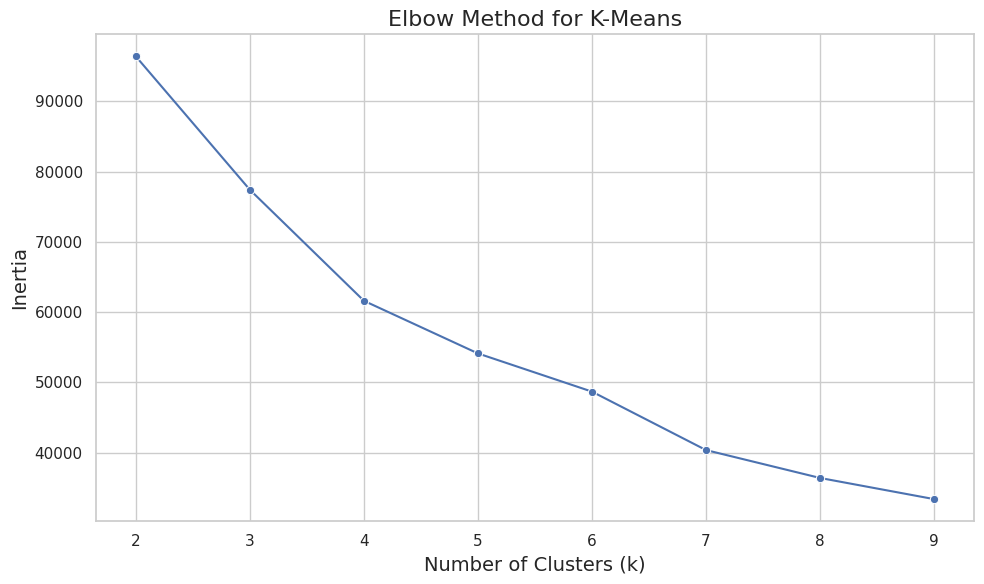

In [28]:
inertia = []
K_range = range(2, 10)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.figure()
sns.lineplot(x=list(K_range), y=inertia, marker="o")
plt.title("Elbow Method for K-Means")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.tight_layout()
plt.show()



In [29]:
for k in range(2, 10):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, labels)
    print(f"k={k}, silhouette={sil:.3f}")


k=2, silhouette=0.518
k=3, silhouette=0.515
k=4, silhouette=0.476
k=5, silhouette=0.414
k=6, silhouette=0.437
k=7, silhouette=0.441
k=8, silhouette=0.405
k=9, silhouette=0.409


In [30]:
k = 4  # change after examining elbow/silhouette
km = KMeans(n_clusters=k, random_state=42)

df_clean['cluster'] = km.fit_predict(X_scaled)


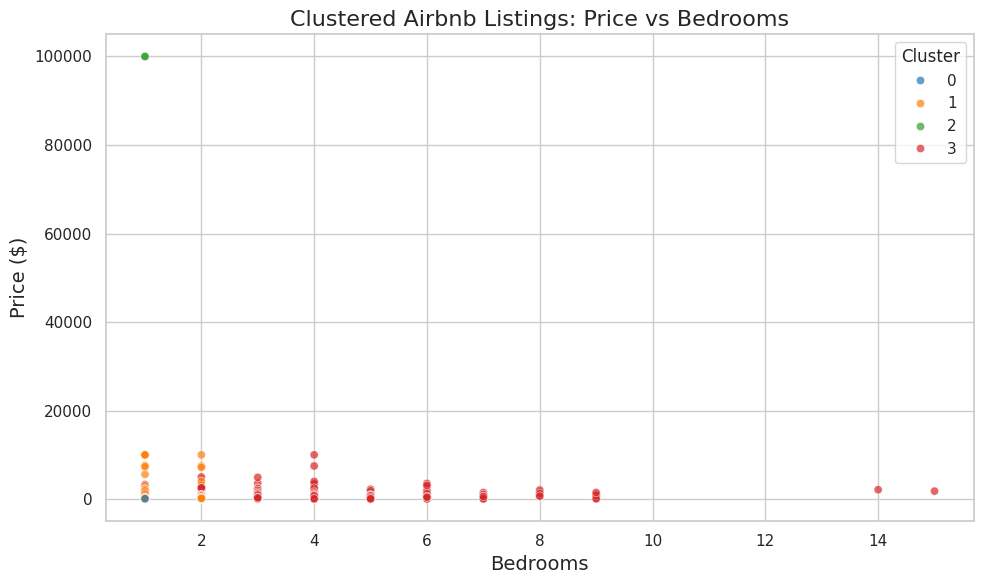

In [31]:
plt.figure()
sns.scatterplot(
    data=df_clean,
    x='bedrooms',
    y='price',
    hue='cluster',
    palette='tab10',
    alpha=0.7
)
plt.title("Clustered Airbnb Listings: Price vs Bedrooms")
plt.xlabel("Bedrooms")
plt.ylabel("Price ($)")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()


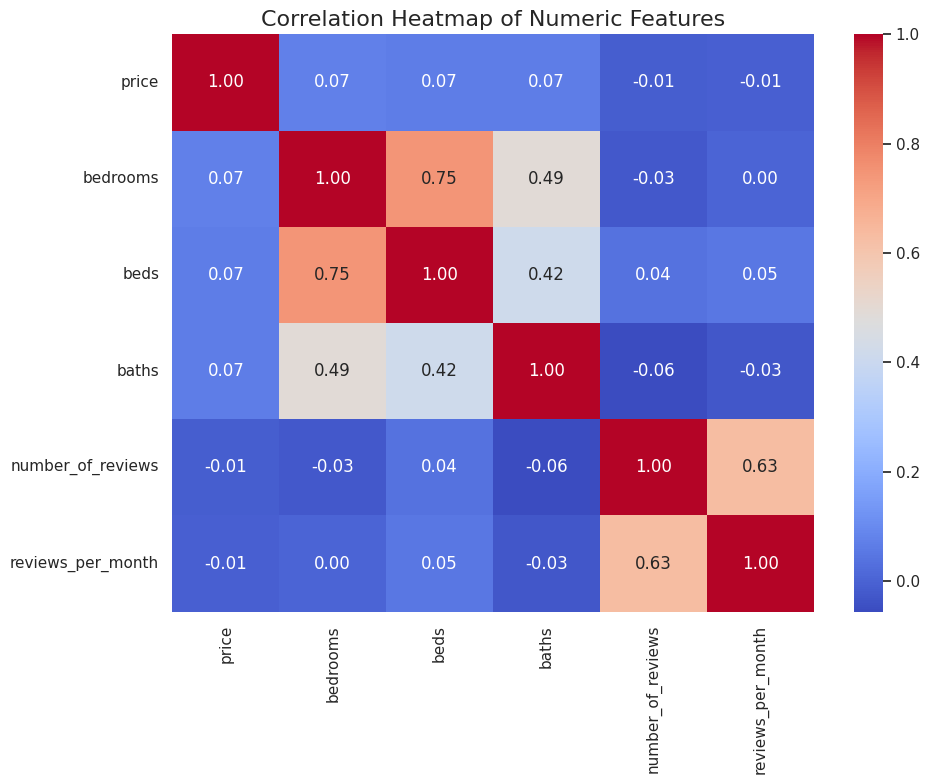

In [32]:
plt.figure(figsize=(10, 8))
corr = df_clean[['price', 'bedrooms', 'beds', 'baths',
                 'number_of_reviews', 'reviews_per_month']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.tight_layout()
plt.show()


In [33]:
X = df_clean.drop(columns=['price', 'cluster'])
y = df_clean['price']


In [34]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [35]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [36]:
print("R² Score:", r2_score(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print("RMSE:", rmse)


R² Score: 0.09083966810330624
RMSE: 325.7263564373687


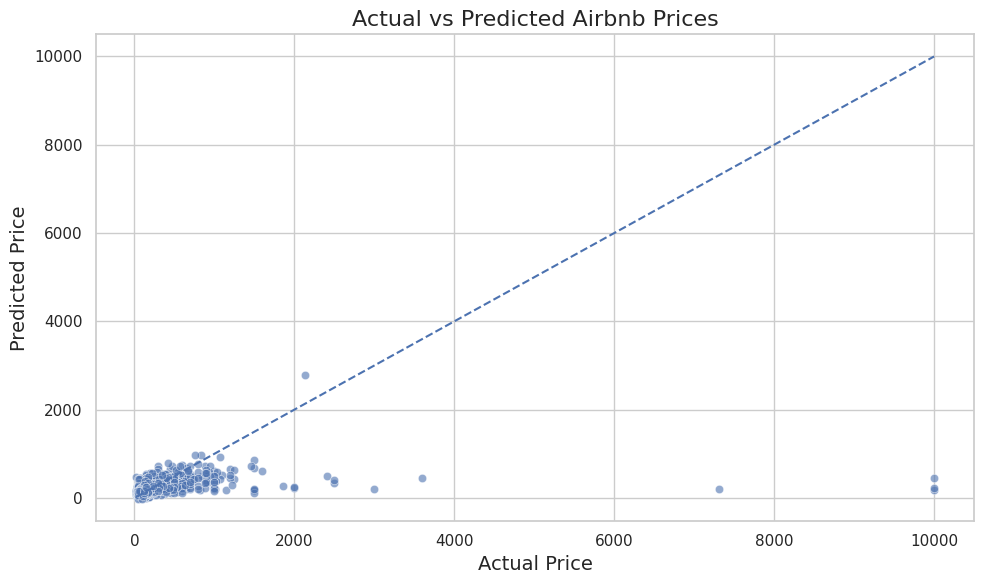

In [37]:
plt.figure()
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Airbnb Prices")
plt.tight_layout()
plt.show()



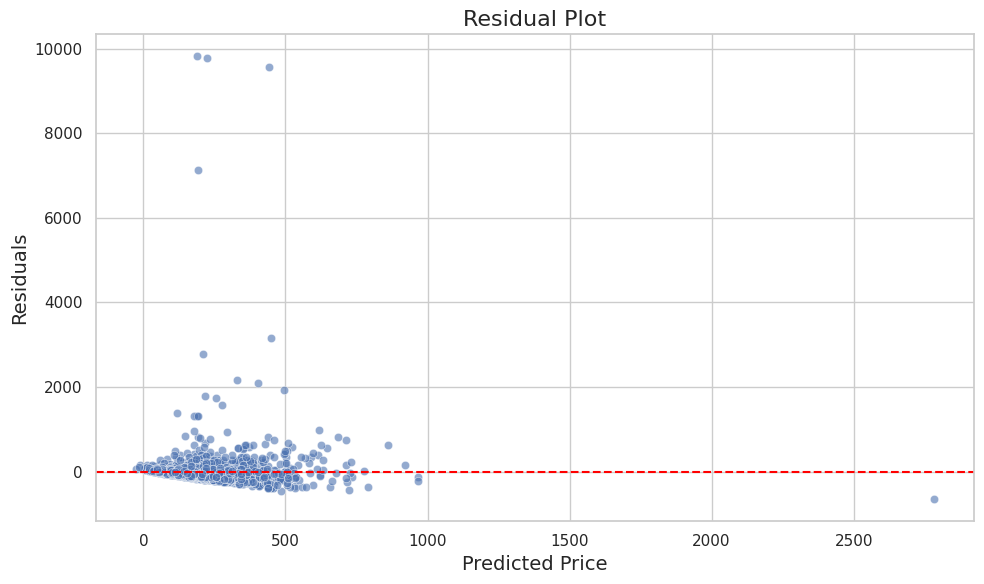

In [38]:
# Create residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure()
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.tight_layout()
plt.show()




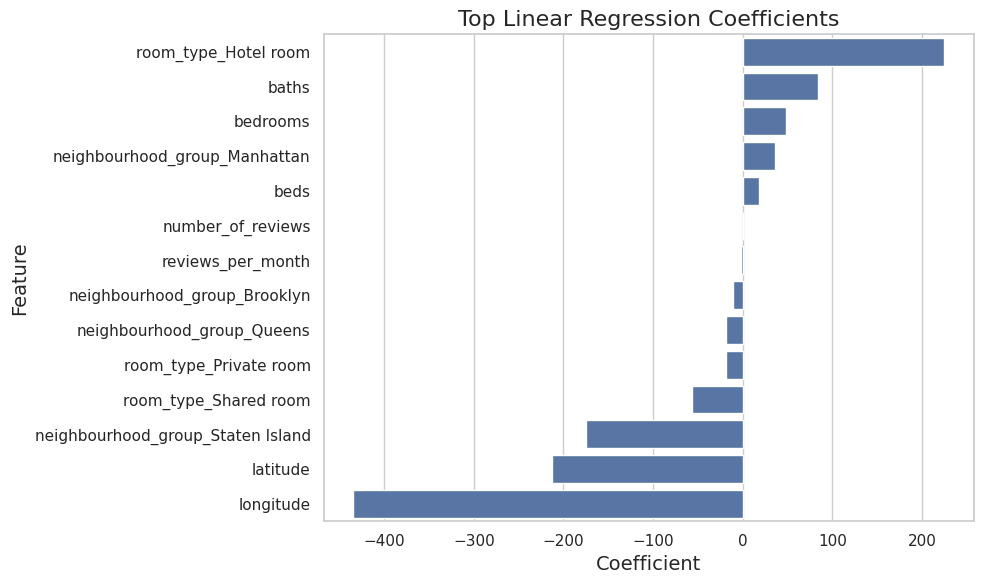

In [39]:
# Recreate coefficient dataframe
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

# Plot top features
plt.figure()
sns.barplot(data=coef_df.head(15), x='Coefficient', y='Feature')
plt.title("Top Linear Regression Coefficients")
plt.tight_layout()
plt.show()


